# 3차과제_와인데이터분류: Logistic_Regression

# **1. 패키지 Import**

In [157]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## **2. 데이터 불러오기**

In [158]:
# Load the dataset
wine_data = pd.read_csv('wine.csv', delimiter=';')

# Inspect the dataset
print(wine_data.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

# 3. 학습/검증 데이터 분리 및 특징 선택

In [159]:
from sklearn.model_selection._split import train_test_split

In [160]:
# Select specific features and target
features = ['alcohol', 'volatile acidity']
X = wine_data[features]
y = wine_data['quality']

In [161]:
# 3. Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1279, 2) (320, 2) (1279,) (320,)


## **4. 스케일링**

### **표준화: StandardScaler**

* 데이터의 특징을 각각 ```평균이 0```이고, ```분산이 1```인 ```가우시안 정규 분포```를 가진 값으로 변환

In [162]:
from sklearn.preprocessing import StandardScaler

In [163]:
ss_scaler = StandardScaler()
X_train_ss = ss_scaler.fit_transform(X_train)
X_test_ss = ss_scaler.fit_transform(X_test)

* 데이터 선택: X_train/X_test, X_train_ss/X_test_ss

In [164]:
X_train = X_train_ss
X_test = X_test_ss

In [165]:
from sklearn.linear_model import LogisticRegression

In [166]:
# 2. 로지스틱 회귀 모델 정의
model = LogisticRegression(max_iter=2000)

# 3. 모델 학습
model.fit(X_train, y_train)

LogisticRegression(max_iter=2000)

* **모델의 하이퍼 파라미터 불러오기**

In [167]:
model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 2000,
 'multi_class': 'deprecated',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

* **GridSearch를 통한 하이퍼파라미터 튜닝**

In [168]:
from sklearn.model_selection import GridSearchCV

In [169]:
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['lbfgs', 'liblinear', 'saga'],
    'penalty': ['l2'],  # L2 규제만 설정
    'max_iter': [100, 200, 500]
}

grid_model = GridSearchCV(
    model,
    param_grid=param_grid,
    cv=2,   # K-fold
    refit=True)

In [170]:
grid_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


GridSearchCV(cv=2, estimator=LogisticRegression(max_iter=2000),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'max_iter': [100, 200, 500], 'penalty': ['l2'],
                         'solver': ['lbfgs', 'liblinear', 'saga']})

In [171]:
# GridSearch 결과 중, 최적 하이퍼파라미터 학습 모델 객체 반환
print(grid_model.best_params_)
best_model = grid_model.best_estimator_

{'C': 0.1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}


## **6. 모델 평가하기**

* 모델 선택:  best_model

In [172]:
model = best_model

In [173]:
from sklearn.metrics import accuracy_score

In [174]:
y_pred = model.predict(X_test)
print(f'분류 정확도: {accuracy_score(y_test, y_pred)}')

분류 정확도: 0.546875


In [175]:
from sklearn.metrics import classification_report

In [176]:
# Unique quality levels for target names
quality_labels = sorted(y_test.unique())  # Ensure labels are sorted

# Generate classification report with appropriate target names
print(classification_report(y_test, y_pred, target_names=[f'Quality {label}' for label in quality_labels]))


              precision    recall  f1-score   support

   Quality 3       0.00      0.00      0.00         1
   Quality 4       0.00      0.00      0.00        10
   Quality 5       0.58      0.79      0.67       130
   Quality 6       0.52      0.51      0.51       132
   Quality 7       0.38      0.12      0.18        42
   Quality 8       0.00      0.00      0.00         5

    accuracy                           0.55       320
   macro avg       0.25      0.24      0.23       320
weighted avg       0.50      0.55      0.51       320



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## **7. 시각화**

> **주의**
> * 2차원으로 시각화 하기 때문에 특징을 2개를 사용하여 학습한 모델만 사용할 것

In [177]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Unique classes in y:", np.unique(y))


X_train shape: (1279, 2)
X_test shape: (320, 2)
Unique classes in y: [3 4 5 6 7 8]


<ipython-input-178-7364f453497d>:17: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolor='k', cmap='coolwarm', s=25, marker="x", label="Test Data")


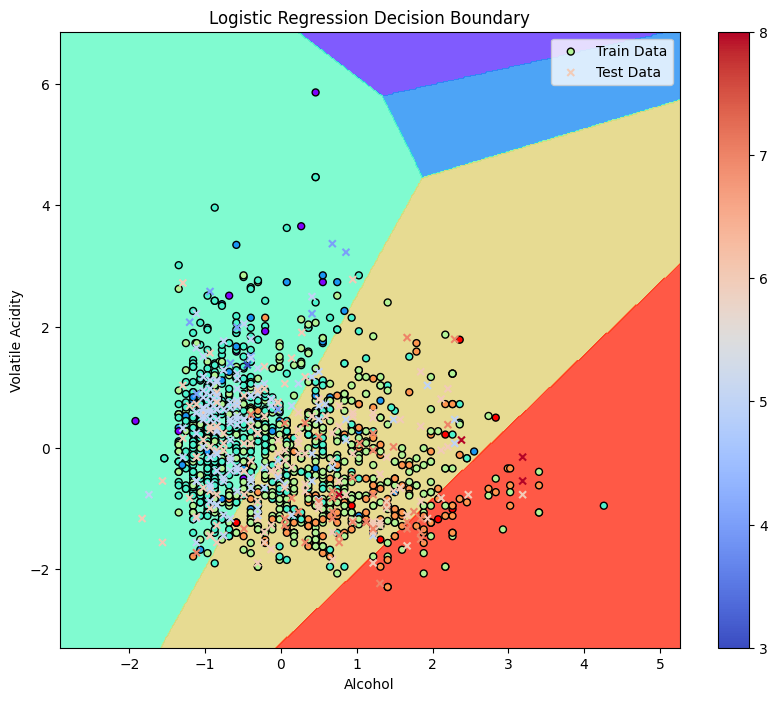

In [178]:
import matplotlib.pyplot as plt
import numpy as np

# 시각화를 위한 그리드 생성
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))

# 결정 경계 예측
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# 결정 경계 시각화
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, alpha=0.8, cmap='rainbow')  # 결정 경계 색상
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolor='k', cmap='rainbow', s=25, label="Train Data")
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolor='k', cmap='coolwarm', s=25, marker="x", label="Test Data")
plt.title("Logistic Regression Decision Boundary")
plt.xlabel('Alcohol')  # 첫 번째 특징
plt.ylabel('Volatile Acidity')  # 두 번째 특징
plt.colorbar()
plt.legend()
plt.show()
